<img src= 'https://149611589.v2.pressablecdn.com/wp-content/uploads/2016/07/stack-overflow.png' width=500/>

source : https://wptavern.com/stack-overflow-documentation-is-now-in-beta

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

__La requête qui a été utilisée pour avoir ses données :__

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
    
SELECT TOP(50000) Id, CreationDate, Score, ViewCount, Title , Tags , Body, AnswerCount,

FROM Posts

WHERE CreationDate BETWEEN CONVERT(datetime, '2022-01-01') AND CONVERT(datetime, '2022-02-01')

AND Score > 5

AND ViewCount > 1 

AND AnswerCount > 1

ORDER BY CreationDate

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

In [1]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import re
from nltk.tokenize import sent_tokenize  # pour découper par phrase
from nltk import word_tokenize  # pour découper par mot
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords  # Permet de retirer les mots non pertinents
import nltk  # -> Librairie pour gérer les stop word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
import plotly.express as px
import os
import sys


# Pour la visualisation :
import pandas as pd

# Pour les calculs mathématiques :
import numpy as np

# Pour la visualisation des datas :
import seaborn as sns
import matplotlib.pyplot as plt
%pylab
%matplotlib inline

# Pour supprimer les warnings
warnings.filterwarnings("ignore")

# pip install nltk  -> pour installer la librairie
# nltk.download()  -> Pour télécharger toute les ressources pour la librairie
# source :  https://www.datacorner.fr/nltk/

# Pour avoir des print et des markdown plus agréable à lire :
# pip install rich -> pour l'installation de la librairie
# from rich import print -> trop de modif à effectuer probablement pour la suite des projets

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults.csv')
df_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults-2.csv')
df_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults-3.csv')
df_3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults-4.csv')
df_4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults-5.csv')
df_5 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults-6.csv')
df_6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/QueryResults-7.csv')

In [5]:
df = pd.concat([df,df_1])
df = pd.concat([df,df_2])
df = pd.concat([df,df_3])
df = pd.concat([df,df_4])
df = pd.concat([df,df_5])
df = pd.concat([df,df_6])
df.head()

,Id,CreationDate,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,70546339,2022-01-01 00:06:23,2,169,<p>I have a form that outputs images and their...,Using A Parent Associative Foreach Loop That C...,<php><foreach><pdo><associative-array>,1,2,2
1,70546369,2022-01-01 00:16:13,0,197,<p>When I want to see a df finding the null va...,How to remove Header Row from DataFrame Output,<python><dataframe>,1,0,1
2,70546372,2022-01-01 00:18:35,2,94,<p>I am new to sql. I know I can run script wi...,How to run sql script in mysql on Ubuntu?,<mysql><sql><script>,1,0,0
3,70546392,2022-01-01 00:25:21,1,898,<p>I am trying to verify an idToken using a pu...,token verification failing using JWK/JWT for u...,<python><oauth-2.0><jwt><rsa><jwk>,1,1,1
4,70546410,2022-01-01 00:31:32,2,472,"<p>I found the <a href=""https://book.pythontip...","Should the ""opening work"" of a context manager...",<python><contextmanager>,2,6,1


In [6]:
"""df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2021_2022.csv')
df_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2020.csv')
df_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2019.csv')
df_3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2018.csv')"""

"df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2021_2022.csv')\ndf_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2020.csv')\ndf_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2019.csv')\ndf_3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stackoverflow/2018.csv')"

In [7]:
df = pd.concat([df, df_1])
df = pd.concat([df, df_2])
df = pd.concat([df, df_3])
df

,Id,CreationDate,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,70546339,2022-01-01 00:06:23,2,169,<p>I have a form that outputs images and their...,Using A Parent Associative Foreach Loop That C...,<php><foreach><pdo><associative-array>,1,2,2
1,70546369,2022-01-01 00:16:13,0,197,<p>When I want to see a df finding the null va...,How to remove Header Row from DataFrame Output,<python><dataframe>,1,0,1
2,70546372,2022-01-01 00:18:35,2,94,<p>I am new to sql. I know I can run script wi...,How to run sql script in mysql on Ubuntu?,<mysql><sql><script>,1,0,0
3,70546392,2022-01-01 00:25:21,1,898,<p>I am trying to verify an idToken using a pu...,token verification failing using JWK/JWT for u...,<python><oauth-2.0><jwt><rsa><jwk>,1,1,1
4,70546410,2022-01-01 00:31:32,2,472,"<p>I found the <a href=""https://book.pythontip...","Should the ""opening work"" of a context manager...",<python><contextmanager>,2,6,1
...,...,...,...,...,...,...,...,...,...,...
8701,72072816,2022-04-30 23:04:22,0,37,<p>I'm fairly new to Python so this might seem...,How does Python's re-declaration of variables ...,<python><variables>,2,0,0
8702,72072863,2022-04-30 23:15:14,1,98,<p>I using docker so I recently placed my work...,Git impossible to discard permissions changes ...,<git><windows-subsystem-for-linux>,0,4,2
8703,72072866,2022-04-30 23:15:28,0,97,<p>When i submit form it doesnot update value ...,Having problem submitting a form without reloa...,<javascript><php><jquery>,3,10,1
8704,72072884,2022-04-30 23:17:46,1,141,<p>I am test <code>provide and inject</code> m...,"Vue3- [Provide and Inject] when data changes ,...",<javascript><vue.js><vue-component><vuejs3>,2,0,1


## __Fonction utiles pour l'exploration :__

In [8]:
# Permet de visualiser le DF :

def visu(data: pd.DataFrame):
    """
    Permet d'avoir une visu du df.

    Parameters :
    ----------

    data: :class:`Dataframe`

    DataFrame avec les données basiques du df : 

    - shape 
    - head 
    - describe 
    - dtypes

    """

    print('-'*100)
    print(" "*45, '\033[1m' + "Shape :"+'\033[0m')  # shape
    print('-'*100, "\n")
    print(
        f"Le nombre de lignes et de colonnes dans le DataFrame sont au nombre de : {data.shape} \n")
    print('-'*100)
    print(" "*45, '\033[1m' + "Head :"+'\033[0m')  # Head
    print('-'*100)
    display(data.head())  # visualisation du df
    print('-'*100)
    print(" "*45, '\033[1m' + "Describe :"+'\033[0m')  # Describe
    print('-'*100)
    display(data.describe().T)  # describe du df chiffre uniquement
    print('-'*100)
    print(" "*41, '\033[1m' + "Type de données :"+'\033[0m')  # Head
    print('-'*100)
    display(data.dtypes)

In [9]:
# Permet de visualiser les NaN du DF de façon globale :

def pct_vals_miss(data: pd.DataFrame):
    """
    Permet d'avoir un % de cellules manquantes.

    Parameters :
    ----------

    data: :class:`Dataframe`
    DataFrame avec le pourcentage de données manquantes sur l'intégralité du df.

    """
    # avec un print possibilité d'avoir une visu par colonne
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100, 2)

In [10]:
# DataFrame de visualisation des manquants :

def miss_value(data: pd.DataFrame):
    """
    Permet d'avoir un % de cellules manquantes.

    Parameters:
    ----------

    data: :class:`Dataframe`
    DataFrame avec les pourcentages de données manquantes par colonnes.

    """

    print('-'*100)
    print(" "*41, '\033[1m' + "Données manquantes :"+'\033[0m')  # Describe
    print('-'*100)

    dico = {}  # on crée un dictionnaire de données
    for col in data.columns:
        dico[col] = []
        dico[col].append(
            round((data[col].notnull().sum()/data.shape[0])*100, 2))
        dico[col].append(data[col].isnull().sum())

    df = pd.DataFrame.from_dict(data=dico, orient="index", columns=[
                                "Pourcentages", "Données manquantes"]).sort_values(by="Données manquantes", ascending=True)
    display(df)

    print('-'*100)
    print(" "*25, '\033[1m'+f"Le pourcentage de données manquantes est de",
          pct_vals_miss(data), "%"+'\033[0m')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html => En cas de modif

In [11]:
def unique_raw(data: pd.DataFrame):

    print('-'*100)
    print(" "*41, '\033[1m' + "Données uniques :"+'\033[0m')  # Describe
    print('-'*100)

    dico = {}  # on crée un dictionnaire de données
    for col in data.columns:
        dico[col] = []
        dico[col].append(round((data[col].nunique()/data.shape[0])*100, 2))
        dico[col].append(data[col].nunique())

    df = pd.DataFrame.from_dict(data=dico, orient="index", columns=[
                                "Pourcentages_uniques", "Données_uniques"]).sort_values(by="Données_uniques", ascending=True)
    display(df)

# __Exploration de données :__

## Visu globale du df :

In [12]:
visu(df)

----------------------------------------------------------------------------------------------------
                                              Shape :
---------------------------------------------------------------------------------------------------- 

Le nombre de lignes et de colonnes dans le DataFrame sont au nombre de : (95729, 10) 

----------------------------------------------------------------------------------------------------
                                              Head :
----------------------------------------------------------------------------------------------------


,Id,CreationDate,Score,ViewCount,Body,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,70546339,2022-01-01 00:06:23,2,169,<p>I have a form that outputs images and their...,Using A Parent Associative Foreach Loop That C...,<php><foreach><pdo><associative-array>,1,2,2
1,70546369,2022-01-01 00:16:13,0,197,<p>When I want to see a df finding the null va...,How to remove Header Row from DataFrame Output,<python><dataframe>,1,0,1
2,70546372,2022-01-01 00:18:35,2,94,<p>I am new to sql. I know I can run script wi...,How to run sql script in mysql on Ubuntu?,<mysql><sql><script>,1,0,0
3,70546392,2022-01-01 00:25:21,1,898,<p>I am trying to verify an idToken using a pu...,token verification failing using JWK/JWT for u...,<python><oauth-2.0><jwt><rsa><jwk>,1,1,1
4,70546410,2022-01-01 00:31:32,2,472,"<p>I found the <a href=""https://book.pythontip...","Should the ""opening work"" of a context manager...",<python><contextmanager>,2,6,1


----------------------------------------------------------------------------------------------------
                                              Describe :
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Id,95729.0,7.168601e+07,677980.213901,70546339.0,71139783.0,71587895.0,72125069.0,73187695.0
Score,95729.0,9.878198e-01,3.577214,-13.0,0.0,0.0,1.0,317.0
ViewCount,95729.0,3.154831e+02,1969.136894,4.0,46.0,83.0,192.0,254390.0
AnswerCount,95729.0,1.055803e+00,1.036471,0.0,0.0,1.0,1.0,36.0
CommentCount,95729.0,2.067033e+00,2.874395,0.0,0.0,1.0,3.0,39.0
FavoriteCount,95729.0,8.884142e-01,0.802686,0.0,1.0,1.0,1.0,79.0


----------------------------------------------------------------------------------------------------
                                          Type de données :
----------------------------------------------------------------------------------------------------


Id                int64
CreationDate     object
Score             int64
ViewCount         int64
Body             object
Title            object
Tags             object
AnswerCount       int64
CommentCount      int64
FavoriteCount     int64
dtype: object

## Valeur manquantes :

In [13]:
# Visualisation des données manquantes
miss_value(df)

----------------------------------------------------------------------------------------------------
                                          Données manquantes :
----------------------------------------------------------------------------------------------------


,Pourcentages,Données manquantes
Id,100.0,0
CreationDate,100.0,0
Score,100.0,0
ViewCount,100.0,0
Body,100.0,0
Title,100.0,0
Tags,100.0,0
AnswerCount,100.0,0
CommentCount,100.0,0
FavoriteCount,100.0,0


----------------------------------------------------------------------------------------------------
                          Le pourcentage de données manquantes est de 0.0 %


## Valeurs uniques :

In [14]:
unique_raw(df)

----------------------------------------------------------------------------------------------------
                                          Données uniques :
----------------------------------------------------------------------------------------------------


,Pourcentages_uniques,Données_uniques
AnswerCount,0.02,23
FavoriteCount,0.03,28
CommentCount,0.03,33
Score,0.10,93
ViewCount,2.95,2822
Tags,49.26,47154
CreationDate,68.80,65860
Body,68.94,65999
Title,68.94,66000
Id,68.95,66002


# __Visualisation pré-traitement :__

## Visualisation des colonnes :

### Via le score :

In [15]:
df_score = pd.pivot_table(df, values=['Id', 'CreationDate', 'ViewCount', 'Body', 'Title', 'Tags',
                                      'AnswerCount'], index=["Score"],
                          aggfunc=np.median)

df_score = df_score.reset_index()
df_score
# ici la colonne ID n'a pas d'interet

,Score,AnswerCount,Id,ViewCount
0,-13,5.0,70765295.0,1420.0
1,-11,2.0,71956916.0,147.0
2,-9,1.0,70936984.0,196.0
3,-8,1.0,71045917.0,84.0
4,-7,1.0,72024049.0,66.0
...,...,...,...,...
88,133,8.0,70857476.0,19140.0
89,150,22.0,71901632.0,98778.0
90,186,20.0,72401421.0,254390.0
91,258,12.0,71892543.0,92571.0


In [16]:
fig = px.box(df_score, y='Score', points="all")
fig.show()
# Certaines données sont outlier > 133

### Fonction de visualisation graphique :

### Via le nombre de vues :

In [17]:
import plotly.express as px

fig = px.histogram(df_score, x="ViewCount")
fig.update_layout(bargap=0.2)
fig.show()
# On a ici des tranches de score pour la visualisation de la satisfaction

## Visualisation via la date de publication : 

- Pour la date de publication, nous allons voir si il y a une réduction du nombre de publication

- Ensuite nous verrons si il y a un impact entre la date de publication et le nombre de vues

### Création d'un delta date:

In [18]:
# Le format était object pour notre analyse, nous allons la passer en datetime :
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

### Visu du Subplot Mois/day/heure :

Text(0.5, 1.0, 'Number of post daily')

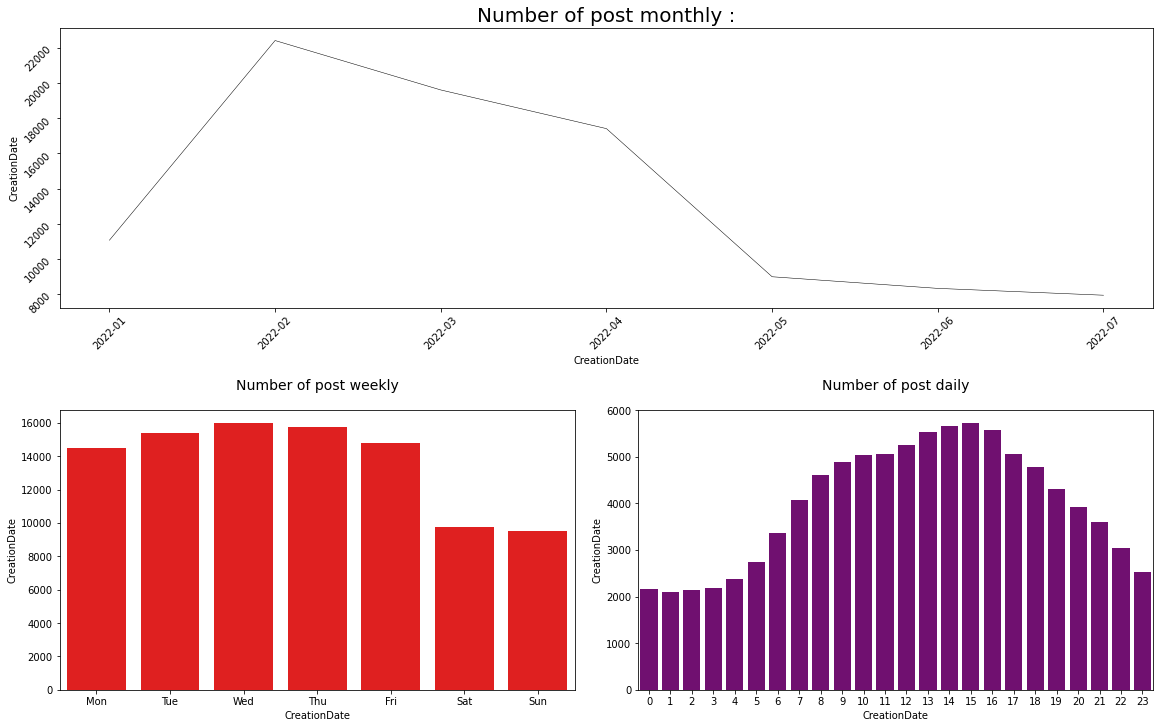

In [19]:
from matplotlib.gridspec import GridSpec  # for specify the grid
# for months :
order_per_month = df.groupby(df['CreationDate'].dt.to_period('M')).count()[
    'CreationDate']
# for weeks day :
order_per_week = df.groupby(df['CreationDate'].dt.weekday).count()[
    'CreationDate']
# For hours :
order_per_hour = df.groupby(df['CreationDate'].dt.hour).count()['CreationDate']

# Create the  3 figures of visualisation (month/week/daily):
fig = plt.figure(constrained_layout=True, figsize=(16, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Month :
sns.lineplot(x=order_per_month.index.astype(str), y=order_per_month, ax=ax1,
             color='black', linewidth=0.5)
ax1.set_title('Number of post monthly :', size=20, color='black')
ax1.tick_params(labelrotation=45)

# Week :

sns.barplot(x=order_per_week.index, y=order_per_week, ax=ax2,
            color='red', linewidth=0.5)
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Number of post weekly', size=14, color='black', pad=20)

# By hours :

sns.barplot(x=order_per_hour.index, y=order_per_hour, ax=ax3,
            color='purple', linewidth=0.5)
ax3.set_title('Number of post daily', size=14, color='black', pad=20)

- En ce qui concerne les données mensuelles, on peut voir qu'il y a une forte regression à partir de Février 2022.

- En ce qui concerne les jours de la semaine, on peut voir que le site est moins solicités en week-end.

- En ce qui concerne les heures, on peut voir qu'on a une forte influence principalement dans le milieu de la journée (de 8h a 18h environ)

## Visualisation des colonnes en boxplot :

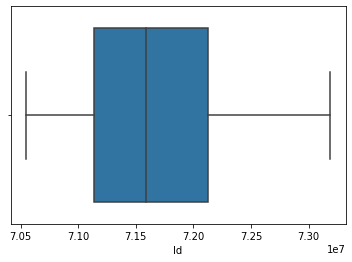

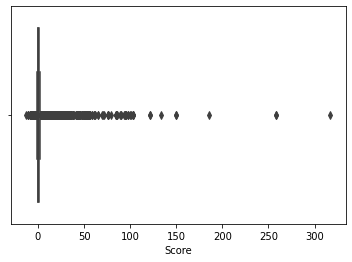

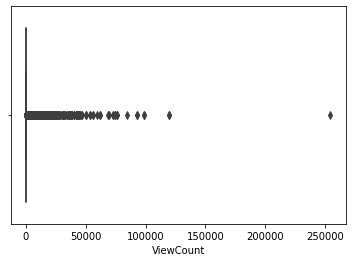

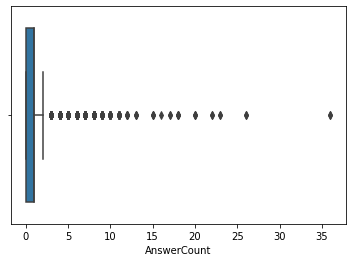

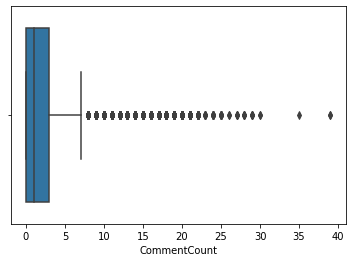

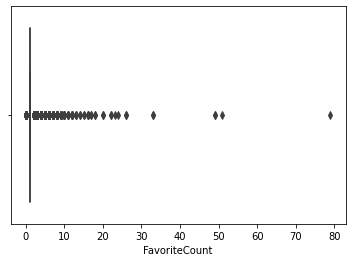

In [20]:
for col in df.columns:
    if df[col].dtypes == 'int64':
        sns.boxplot(x=col, data=df)
        plt.show()

On peut voir ici que certaines données sont inférieurs à 0, il va falloir les retirer de notre analyse.

## Visualisation des corrélations :

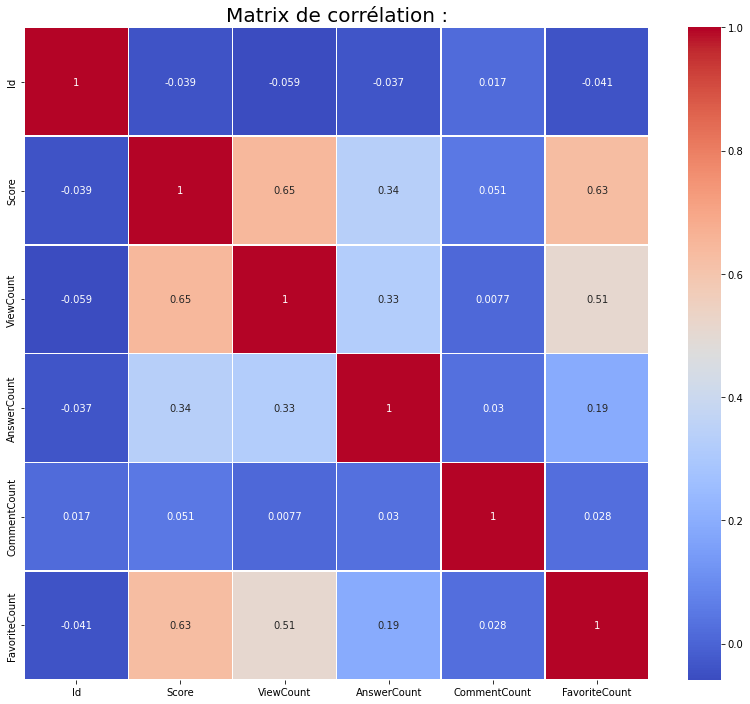

In [21]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, linewidths=.5)
plt.title("Matrix de corrélation :", size=20)
plt.show()

On peut voir certaines corrélations qui ressortent dans le tas, comme le score est corrélé avec le nombre de vues et le nombre de favoris, et à minima au nombre de réponses.

## Visualisation des token pré-traitement :

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

### Pour Tags : 

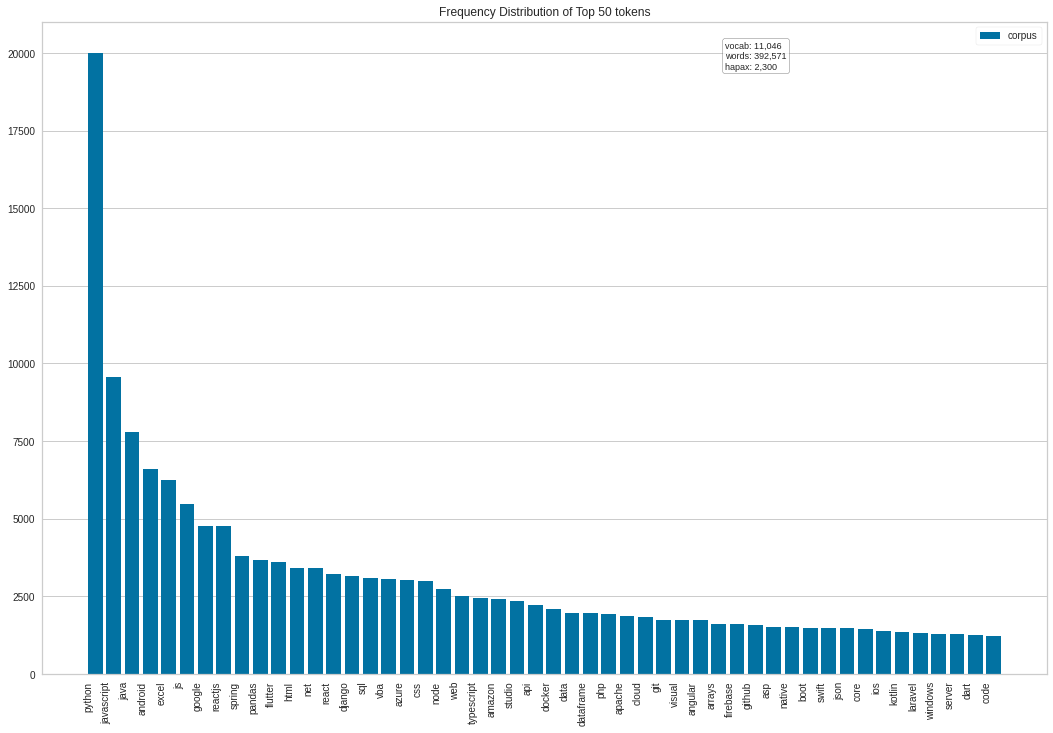

In [23]:
# Load the text data
Balise = df.Tags

vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(Balise)
features = vectorizer.get_feature_names()
plt.figure(figsize=(18, 12))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

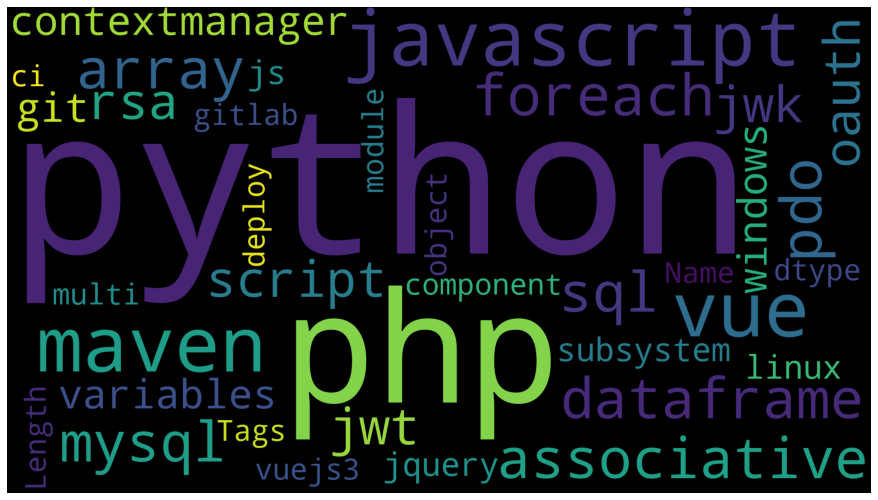

In [24]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1920, height=1080,
                      max_words=250,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(str(df["Tags"]))

# plot the WordCloud image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)  # Pour visualiser le nuage de mots
plt.axis("off")  # Pour éviter d'avoir les axes affichés en score.
plt.tight_layout(pad=0)

plt.show()

### Pour Title :

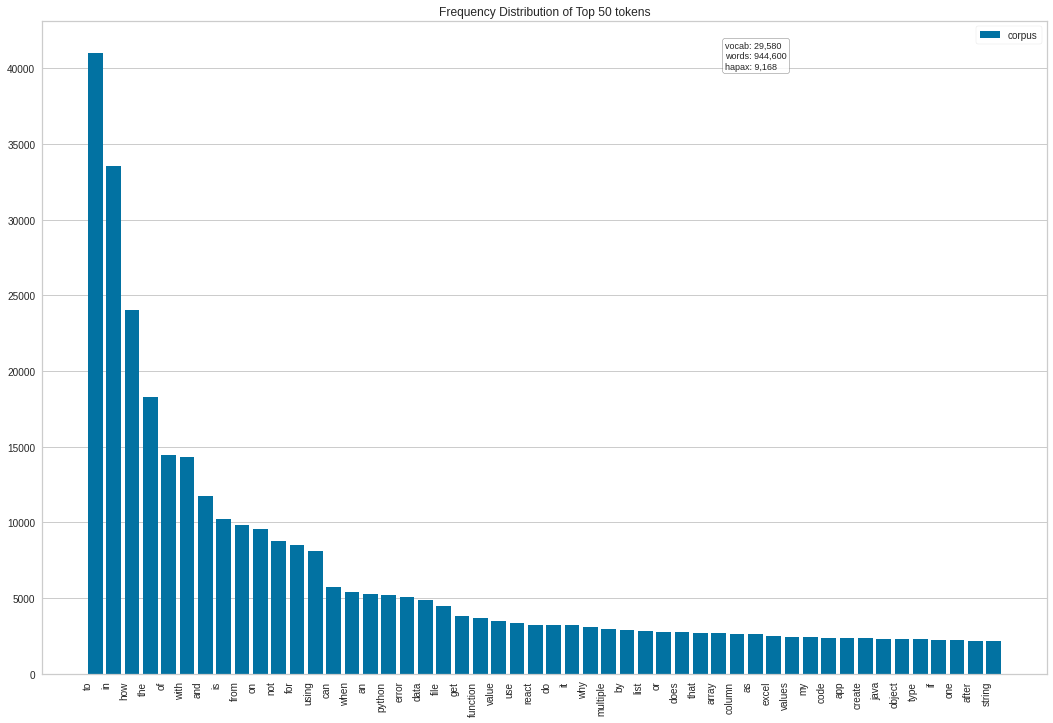

In [25]:
# Load the text data
Balise = df.Title

vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(Balise)
features = vectorizer.get_feature_names()
plt.figure(figsize=(18, 12))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

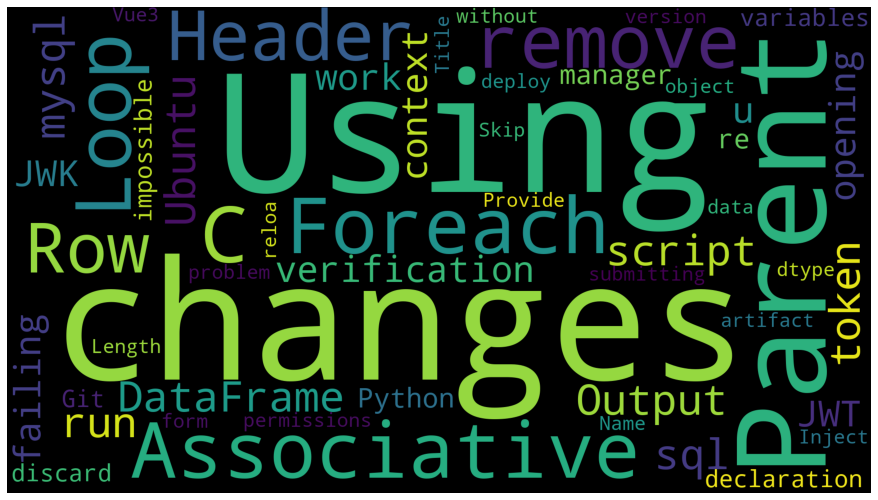

In [26]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1920, height=1080,
                      max_words=250,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(str(df["Title"]))

# plot the WordCloud image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)  # Pour visualiser le nuage de mots
plt.axis("off")  # Pour éviter d'avoir les axes affichés en score.
plt.tight_layout(pad=0)

plt.show()

On peut voir ici, qu'il n'y a aucune tendance dans les mots, car ce sont des mots génériques, il faudra donc utiliser le preprocessing pour ressortir des tendances.

### Pour Body :

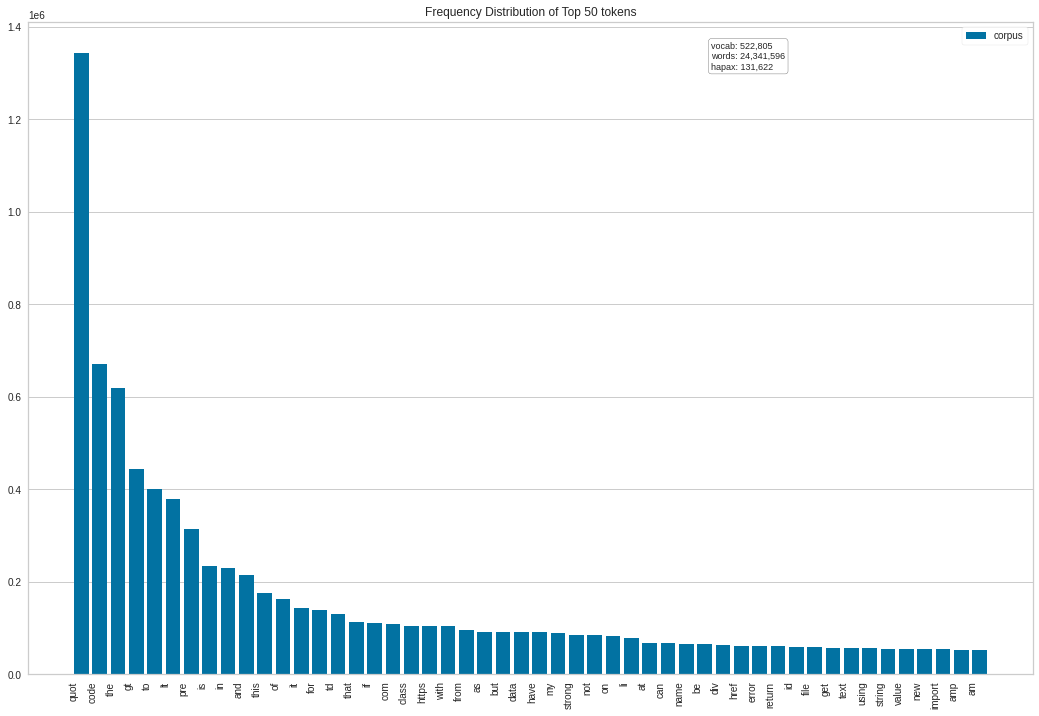

In [27]:
# Load the text data
Balise = df.Body

vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(Balise)
features = vectorizer.get_feature_names()
plt.figure(figsize=(18, 12))
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

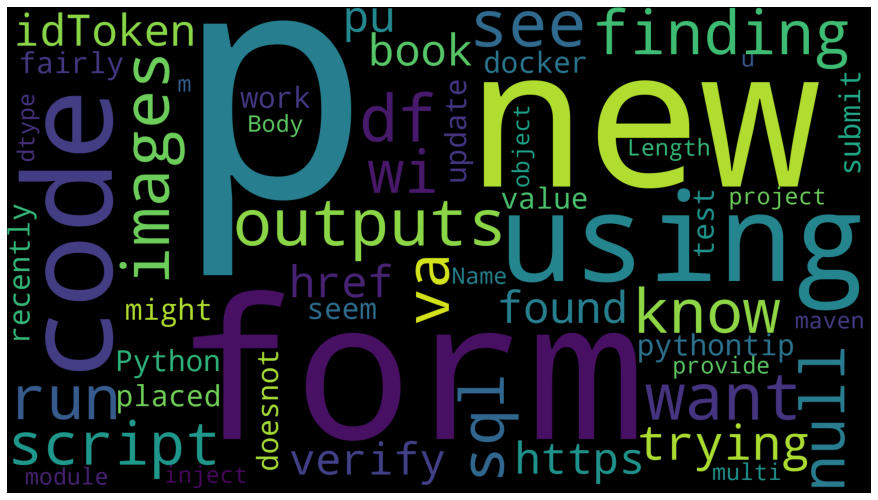

In [28]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1920, height=1080,
                      max_words=250,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(str(df["Body"]))

# plot the WordCloud image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)  # Pour visualiser le nuage de mots
plt.axis("off")  # Pour éviter d'avoir les axes affichés en score.
plt.tight_layout(pad=0)

plt.show()

Comme pour le body, le title ne sort pas de tendance. A voir avec le preprocessing.

## Choix des colonnes :

In [29]:
df = df[['Title', 'Body', 'Tags']]

# Création du CSV :

In [30]:
df.to_csv("P5_exploration.csv", index=False)